In [1]:
from differentiable_grammar_gan import *
import numpy as np

In [2]:
G_output_dim = 1
num_filters = [1024, 512, 256, 128]
G = Generator(num_filters, G_output_dim,N=12,max_seq_length=12,lstm_output_size=100)

In [3]:
PATH='MNIST_Grammar_checkpoints/18'
G.load_state_dict(torch.load(PATH))

<All keys matched successfully>

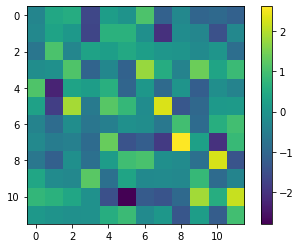

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
G.eval()
grammar_matrix=G.grammar.grammar_mat
plt.imshow(grammar_matrix.cpu().numpy())
plt.colorbar()

In [58]:
def to_one_hot(y, n_dims=None):
    """ Take integer y (tensor or variable) with n dims and convert it to 1-hot representation with n+1 dims. """
    y_tensor = y.data if isinstance(y, Variable) else y
    y_tensor = y_tensor.type(torch.LongTensor).view(-1, 1)
    n_dims = n_dims if n_dims is not None else int(torch.max(y_tensor)) + 1
    y_one_hot = torch.zeros(y_tensor.size()[0], n_dims).scatter_(1, y_tensor, 1)
    y_one_hot = y_one_hot.view(*y.shape, -1)
    return Variable(y_one_hot) if isinstance(y, Variable) else y_one_hot
G.cuda()
num_samples=128
token_num=2
idxs_tensor=torch.ones(num_samples)*token_num
batch=to_one_hot(idxs_tensor,n_dims=12).cuda()
generated=G(batch)
sequence=G.grammar.sequence

In [59]:
G.grammar.sequence.shape

torch.Size([12, 128, 12])

In [61]:
sequence_mat=G.grammar.sequence.cpu().detach().numpy()
characters=['A','B','C','D','E','F','G','H','I','J','K','S']
character_sequences=[]
for i in range(128):
    character_seq=''
    for j in range(12):
        character_seq+=characters[np.where(sequence_mat[j,i,:]==1)[0][0]]
    character_sequences.append(character_seq)

<ipython-input-63-db131fa51647>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


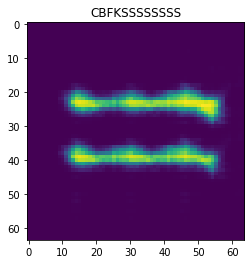

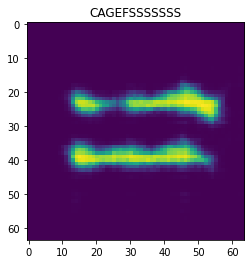

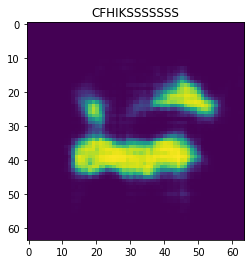

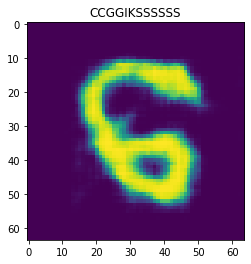

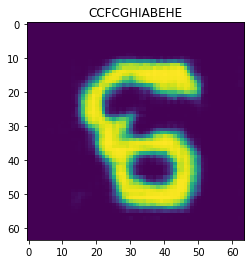

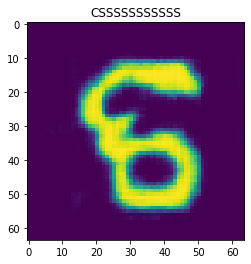

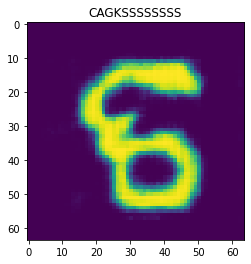

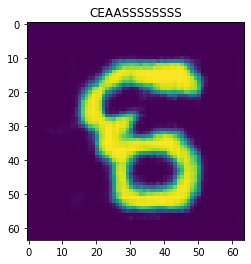

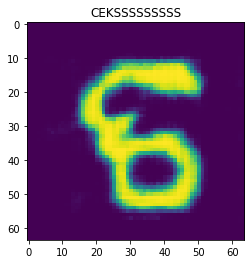

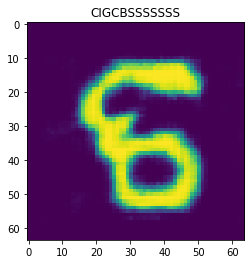

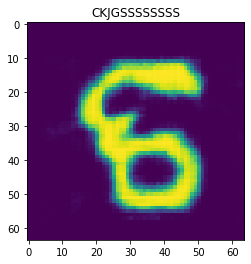

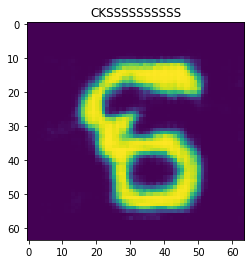

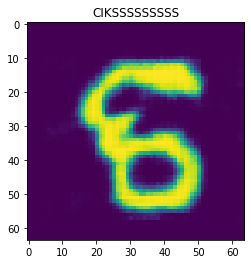

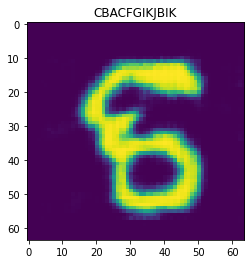

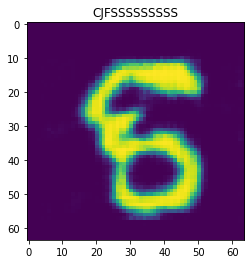

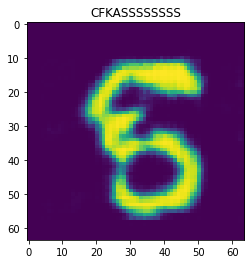

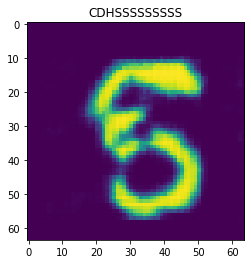

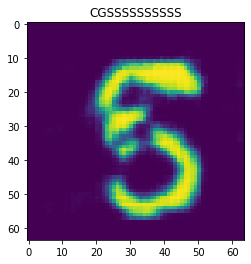

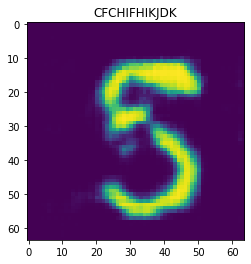

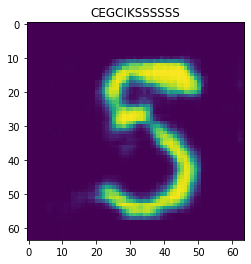

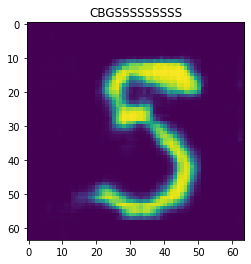

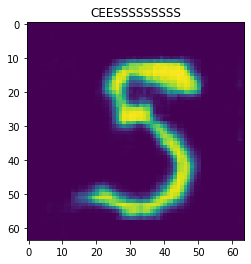

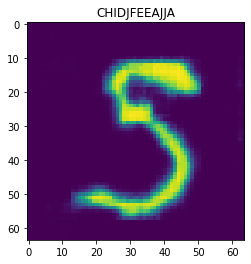

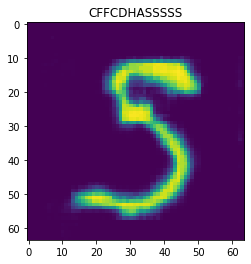

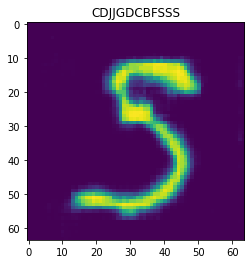

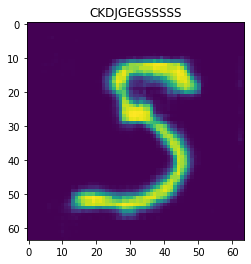

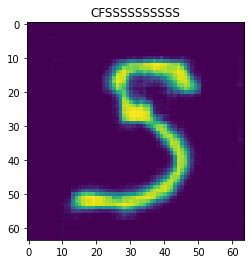

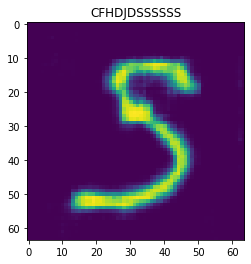

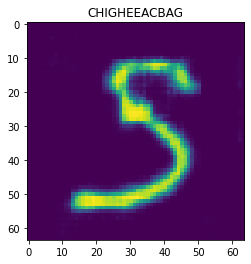

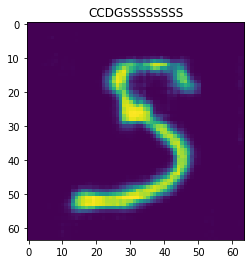

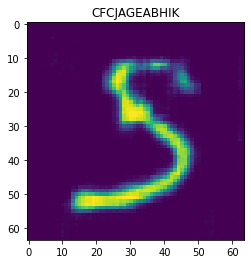

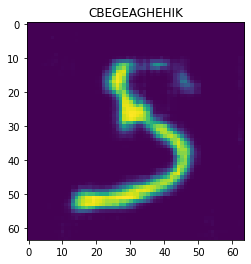

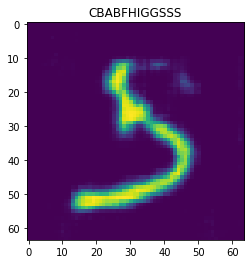

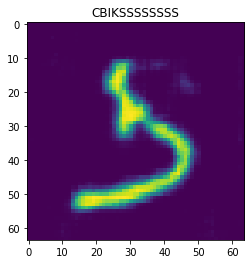

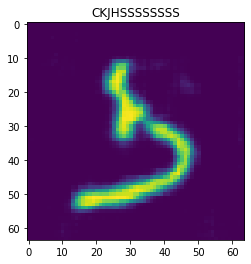

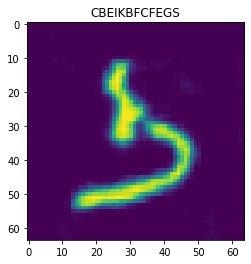

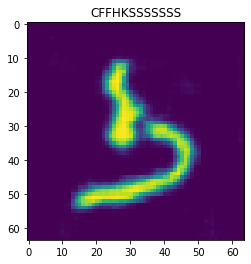

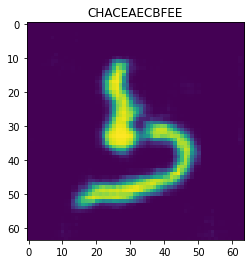

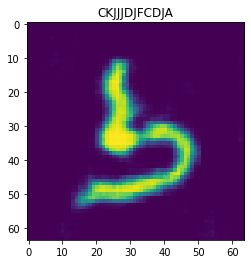

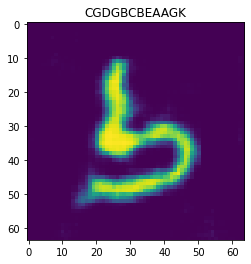

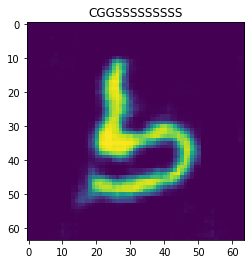

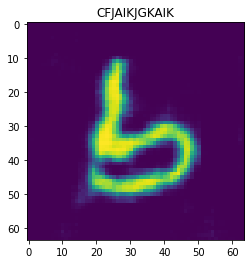

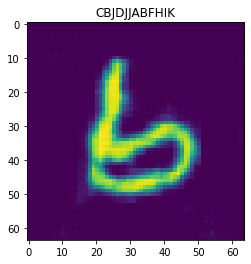

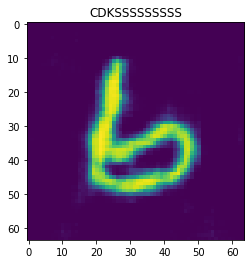

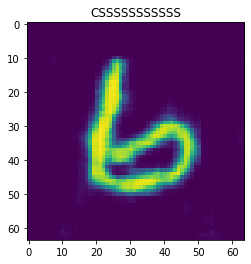

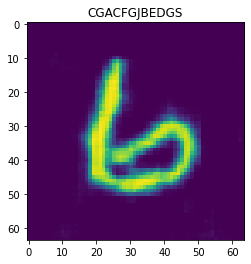

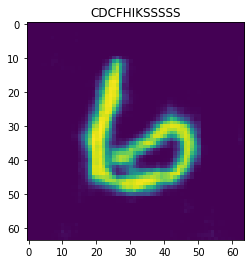

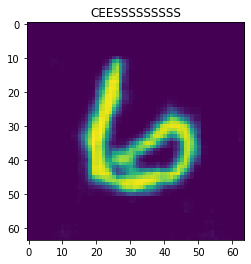

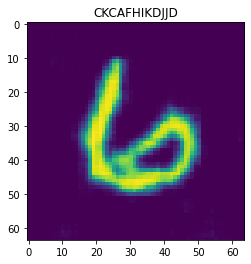

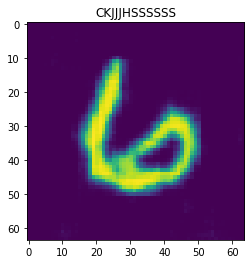

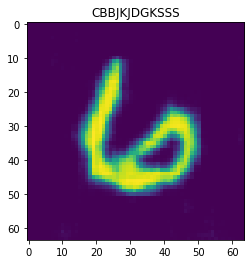

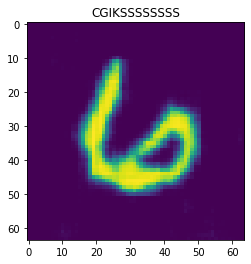

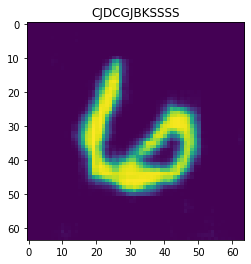

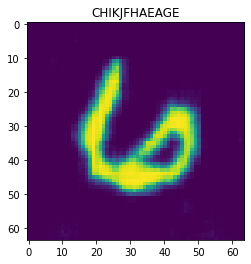

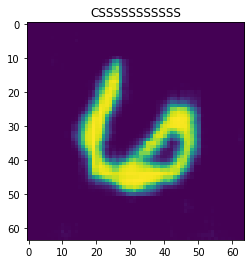

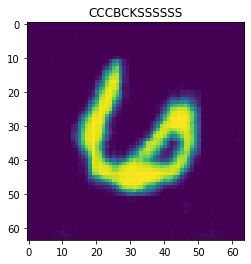

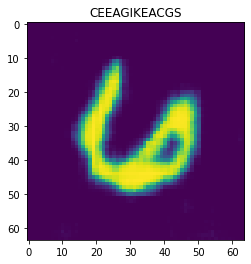

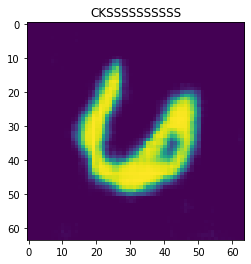

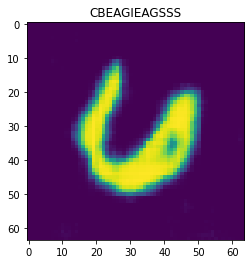

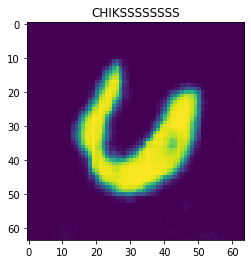

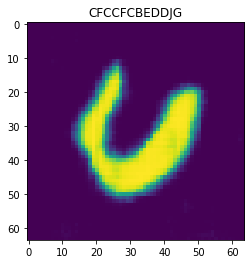

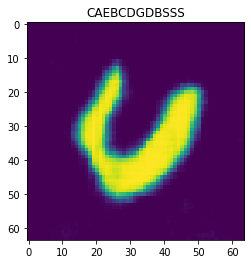

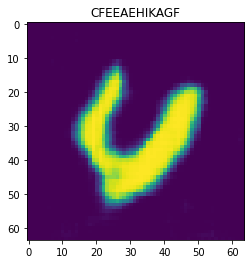

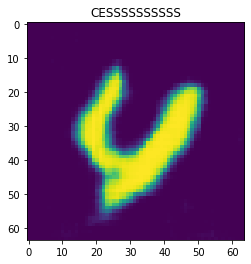

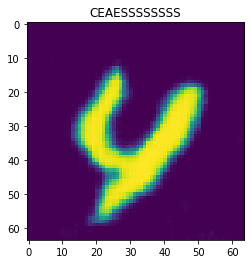

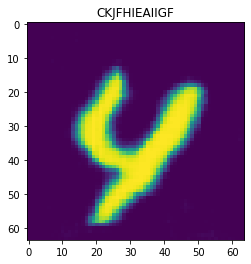

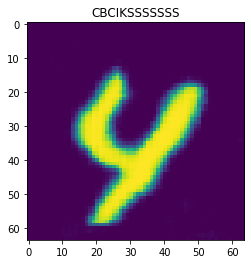

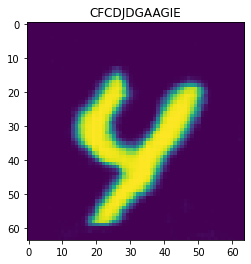

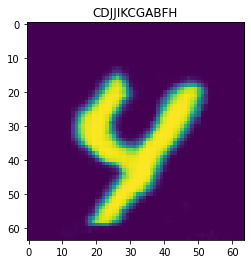

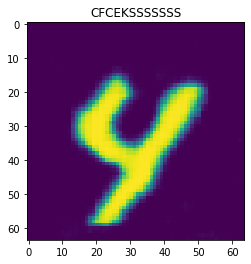

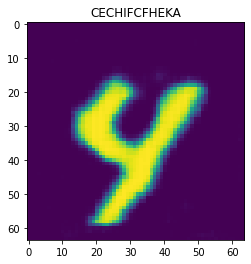

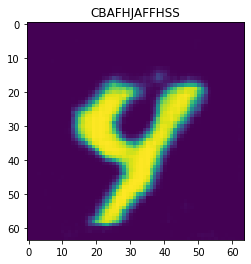

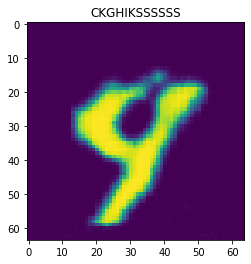

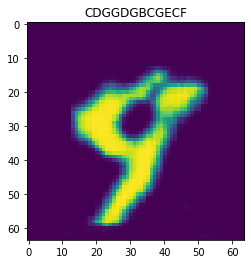

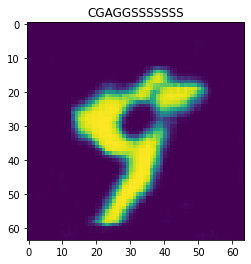

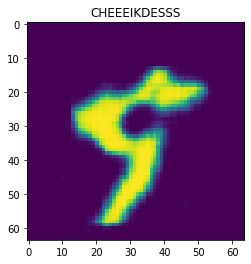

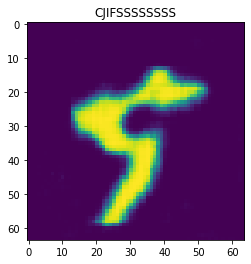

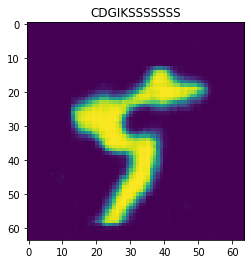

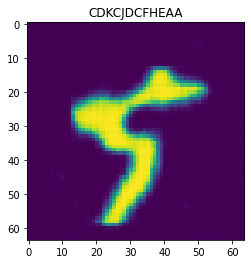

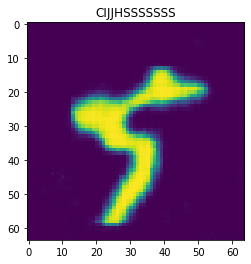

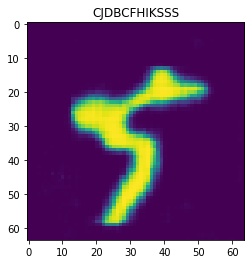

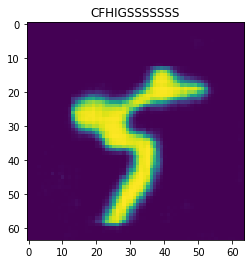

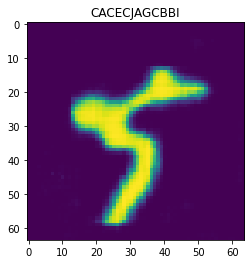

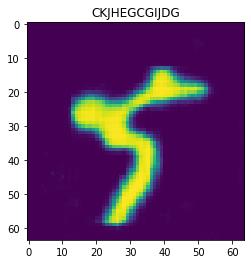

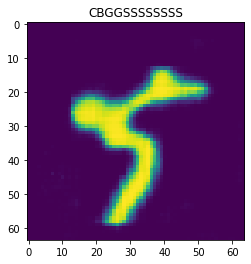

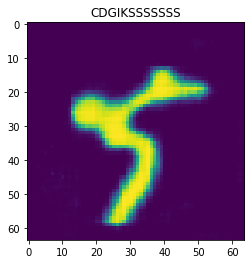

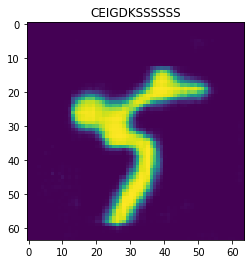

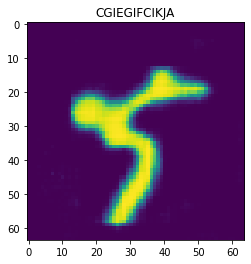

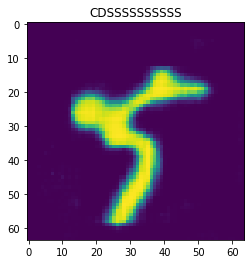

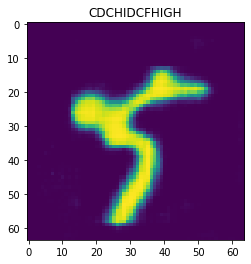

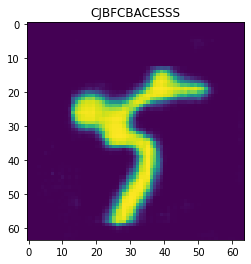

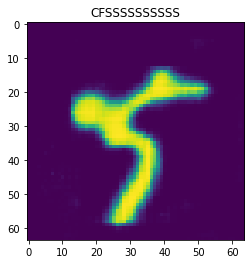

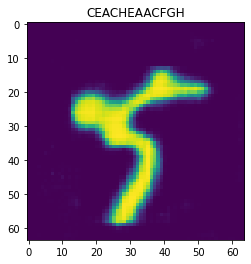

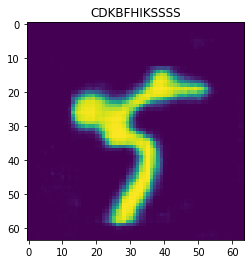

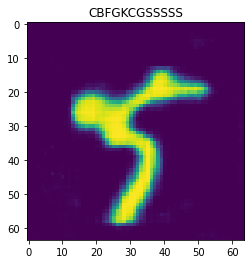

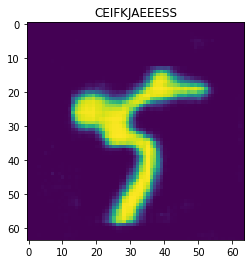

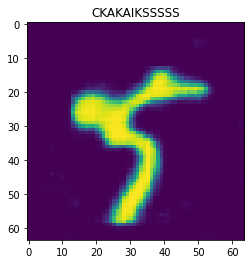

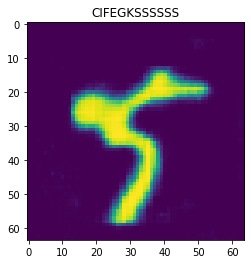

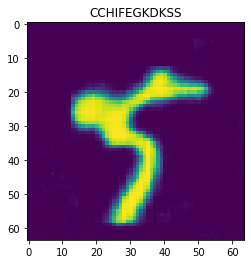

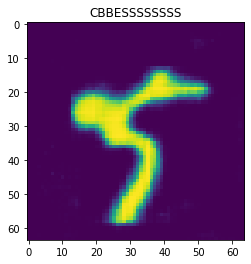

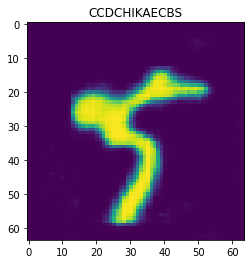

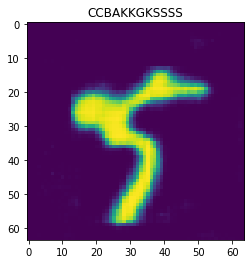

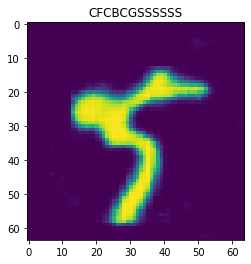

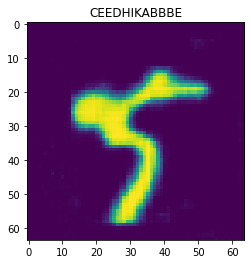

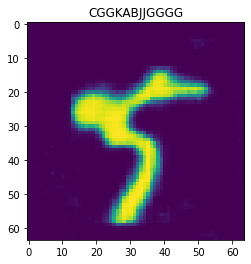

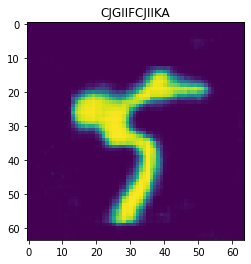

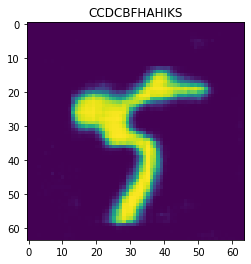

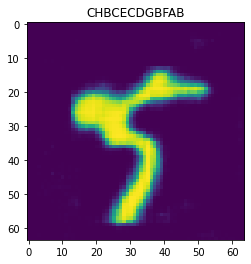

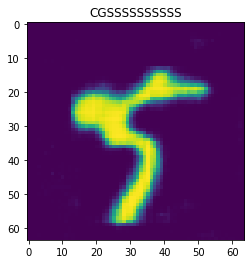

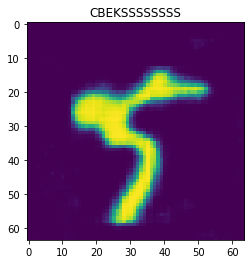

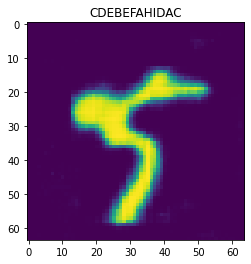

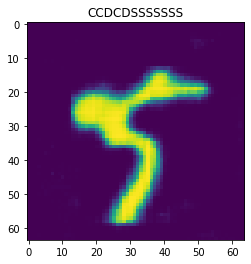

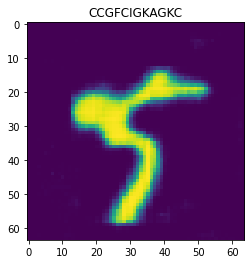

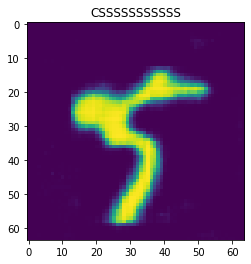

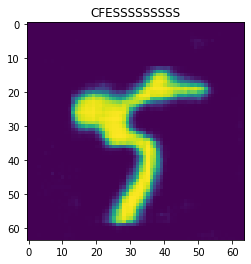

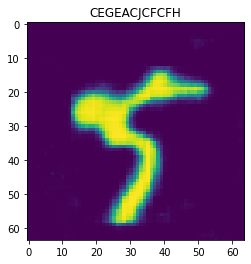

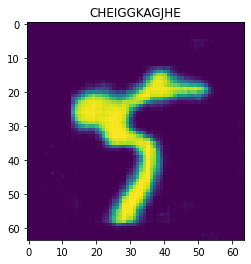

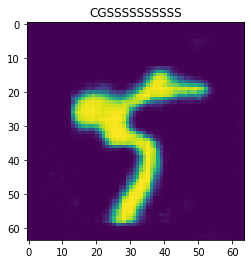

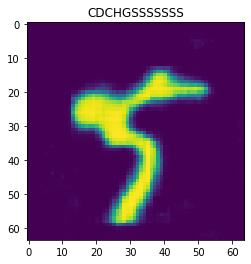

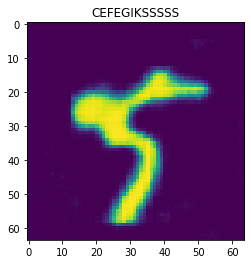

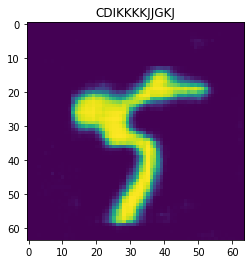

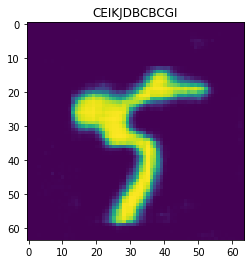

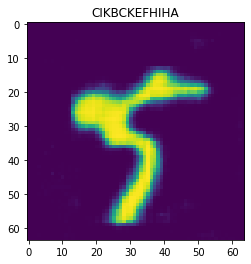

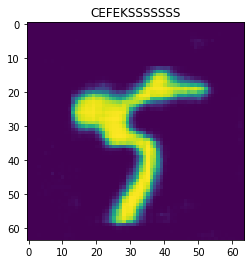

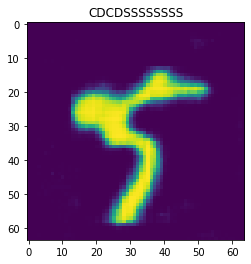

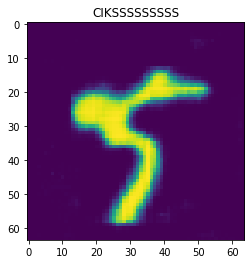

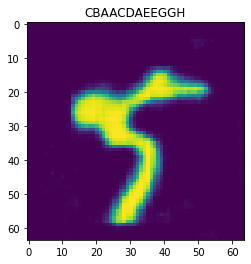

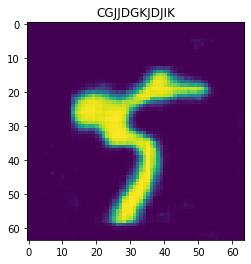

<Figure size 432x288 with 0 Axes>

In [63]:
detached=generated.cpu().detach().numpy()
for i in range(128):
    plt.imshow(detached[i,0])
    plt.title(character_sequences[i])
    plt.figure()